Since the backbone has been frozen in our approach, users can conveniently acquire the pre-trained weights from [facebookresearch](https://dl.fbaipublicfiles.com/dinov2/dinov2_vitl14/dinov2_vitl14_pretrain.pth). With these weights, users can effortlessly generate the complete model weights using `dinov2_rein_and_head.pth`.

In [19]:
! python tools/generate_full_weights.py --dinov2_segmentor_path checkpoints/dinov2_segmentor.pth --backbone checkpoints/dinov2_vitl14_pretrain.pth --rein_head dinov2_rein_and_head.pth

In [20]:
# import and init
import torch
import torch.nn as nn
import rein
from mmengine.config import Config
from mmseg.apis.inference import inference_model,show_result_pyplot,init_model
import matplotlib.pyplot as plt
cfg=Config.fromfile('configs/dinov2/rein_dinov2_mask2former_512x512_bs1x4.py')
network:nn.Module=init_model(cfg,'checkpoints/dinov2_segmentor.pth','cuda:0')
network.cfg=cfg
network.cfg.test_pipeline=network.cfg.bdd_test_pipeline
torch.set_grad_enabled(False)

Loads checkpoint by local backend from path: checkpoints/dinov2_segmentor.pth


(-0.5, 1279.5, 719.5, -0.5)

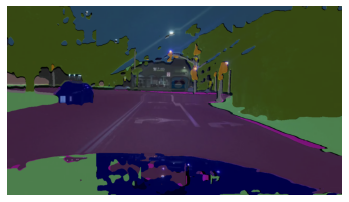

In [21]:
im_path='nightbdd.jpg'
result=inference_model(network,im_path)
vis_img=show_result_pyplot(network,im_path,result)
plt.imshow(vis_img)
plt.axis('off')

Even without accessing any real urban-scene datasets, we still generated impressive segmentation effects in real cities.

(-0.5, 2047.5, 1023.5, -0.5)

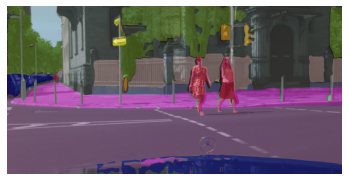

In [22]:
im_path='citys1.png'
result=inference_model(network,im_path)
vis_img=show_result_pyplot(network,im_path,result)
plt.imshow(vis_img)
plt.axis('off')

(-0.5, 2047.5, 1023.5, -0.5)

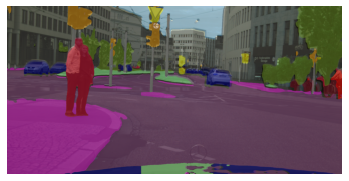

In [23]:
im_path='citys2.png'
result=inference_model(network,im_path)
vis_img=show_result_pyplot(network,im_path,result)
plt.imshow(vis_img)
plt.axis('off')